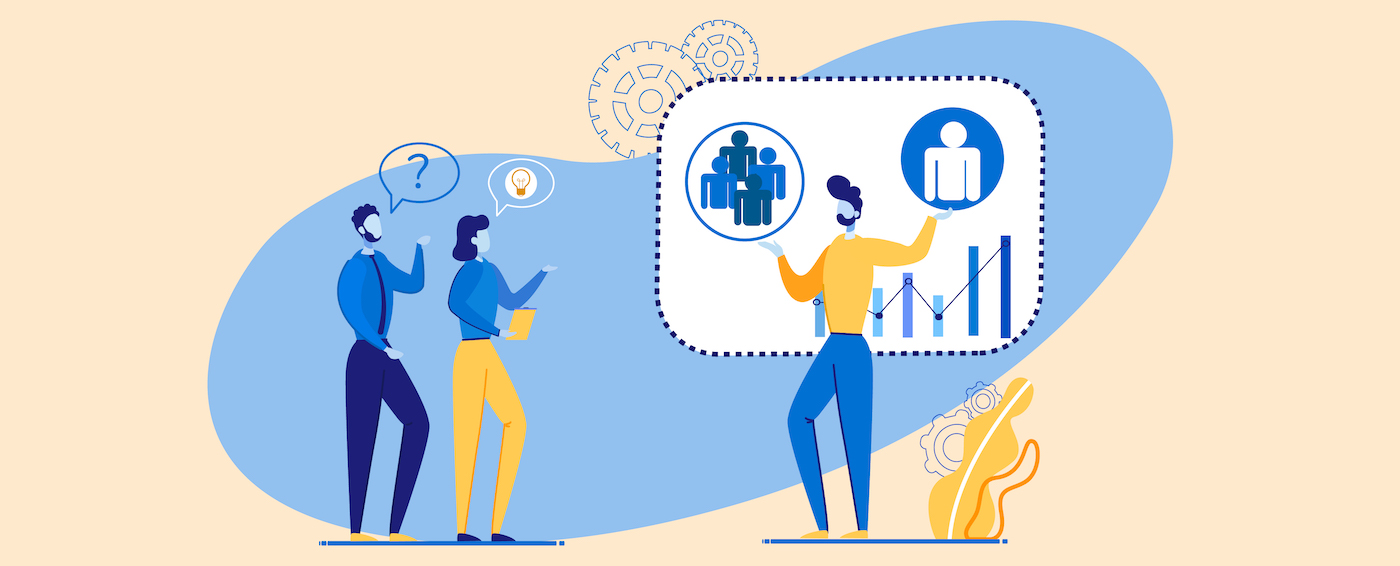

__In this project , we are going to group customers into distinct clusters based on their behavior or attributes using unsupervised learning in a customer clustering project within ( GMM, MiniBatchKMeans, MeanShift, AgglomerativeClustering ) algorithms,  so lets get started__

# 1 | Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

from sklearn.model_selection import GridSearchCV
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from sklearn.preprocessing import StandardScaler
from fancyimpute import IterativeImputer

from sklearn.neighbors import LocalOutlierFactor
from itertools import product

import warnings

__Set style :__

In [2]:
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

__Ignore warnings :__

In [3]:
warnings.filterwarnings("ignore")

# 2 | Read Dataset

In [4]:
df1 = pd.read_csv("Customer_Data.csv")

In [5]:
df1

CUSTID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365   

__In this dataset, there are 8950 rows and 18 columns__

# 3 | About Dataset


<table  width = 100%>
  <thead style = "background-color : lightblue;">
    <tr>
      <th style="text-align: left;">Item</th>
      <th style="text-align: left;">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align: left;">BALANCE</td>
      <td style="text-align: left;">Outstanding balance on the credit card account</td>
    </tr>
    <tr>
      <td style="text-align: left;">BALANCE_FREQUENCY</td>
      <td style="text-align: left;">How often the balance is updated</td>
    </tr>
    <tr>
      <td style="text-align: left;">PURCHASES</td>
      <td style="text-align: left;">Total amount of purchases made on the credit card</td>
    </tr>
    <tr>
      <td style="text-align: left;">ONEOFF_PURCHASES</td>
      <td style="text-align: left;">Total amount of one-time purchases made on the credit card</td>
    </tr>
    <tr>
      <td style="text-align: left;">INSTALLMENTS_PURCHASES</td>
      <td style="text-align: left;">Total amount of purchases made on the credit card that were paid back in installments</td>
    </tr>
    <tr>
      <td style="text-align: left;">CASH_ADVANCE</td>
      <td style="text-align: left;">Amount of cash withdrawn from the credit card account as a cash advance</td>
    </tr>
    <tr>
      <td style="text-align: left;">PURCHASES_FREQUENCY</td>
      <td style="text-align: left;">How often purchases are made on the credit card</td>
    </tr>
    <tr>
      <td style="text-align: left;">ONEOFF_PURCHASES_FREQUENCY</td>
      <td style="text-align: left;">How often one-time purchases are made on the credit card</td>
    </tr>
    <tr>
      <td style="text-align: left;">PURCHASES_INSTALLMENTS_FREQUENCY</td>
      <td style="text-align: left;">How often purchases that are paid back in installments are made on the credit card</td>
    </tr>
    <tr>
      <td style="text-align: left;">CASH_ADVANCE_FREQUENCY</td>
      <td style="text-align: left;">How often cash advances are taken out on the credit card</td>
    </tr>
    <tr>
      <td style="text-align: left;">CASH_ADVANCE_TRX</td>
      <td style="text-align: left;">Number of cash advance transactions made on the credit card account</td>
    </tr>
    <tr>
      <td style="text-align: left;">PURCHASES_TRX</td>
      <td style="text-align: left;">Number of purchase transactions made on the credit card account</td>
    </tr>
    <tr>
      <td style="text-align: left;">CREDIT_LIMIT</td>
      <td style="text-align: left;">Maximum amount of credit the customer is allowed to use on the credit card</td>
    </tr>
    <tr>
      <td style="text-align: left;">PAYMENTS</td>
      <td style="text-align: left;">Total amount of payments made on the credit card account</td>
    </tr>
    <tr>
      <td style="text-align: left;">MINIMUM_PAYMENTS</td>
      <td style="text-align: left;">Minimum amount of payments required on the credit card account</td>
    </tr>
    <tr>
      <td style="text-align: left;">PRC_FULL_PAYMENT</td>
      <td style="text-align: left;">Percentage of the balance that is paid in full by the customer each month</td>
    </tr>
    <tr>
      <td style="text-align: left;">TENURE</td>
      <td style="text-align: left;">Number of years the customer has been using the credit card account</td>
    </tr>
  </tbody>
</table>


# 4 | Dataset Overview

## 4.1 | Dataset Basic Information

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUSTID                            8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

+ __There are some missing values on the CREDIT_LIMIT & the MINIMUM_PAYMENTS Features__

## 4.2 | Dataset Numerical Features Description

In [7]:
df1.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

+ __There is some worng / incorrect data on some features which will be checked more carefully later__

## 4.3 | Feature Unique Value Frequency 

In [8]:
def set_freq_label(ax, fmt = "%g", padding = 0, digitSize = 10) :
    for cont in ax.containers :
        ax.bar_label(cont, fmt = fmt, padding = padding, size = digitSize)

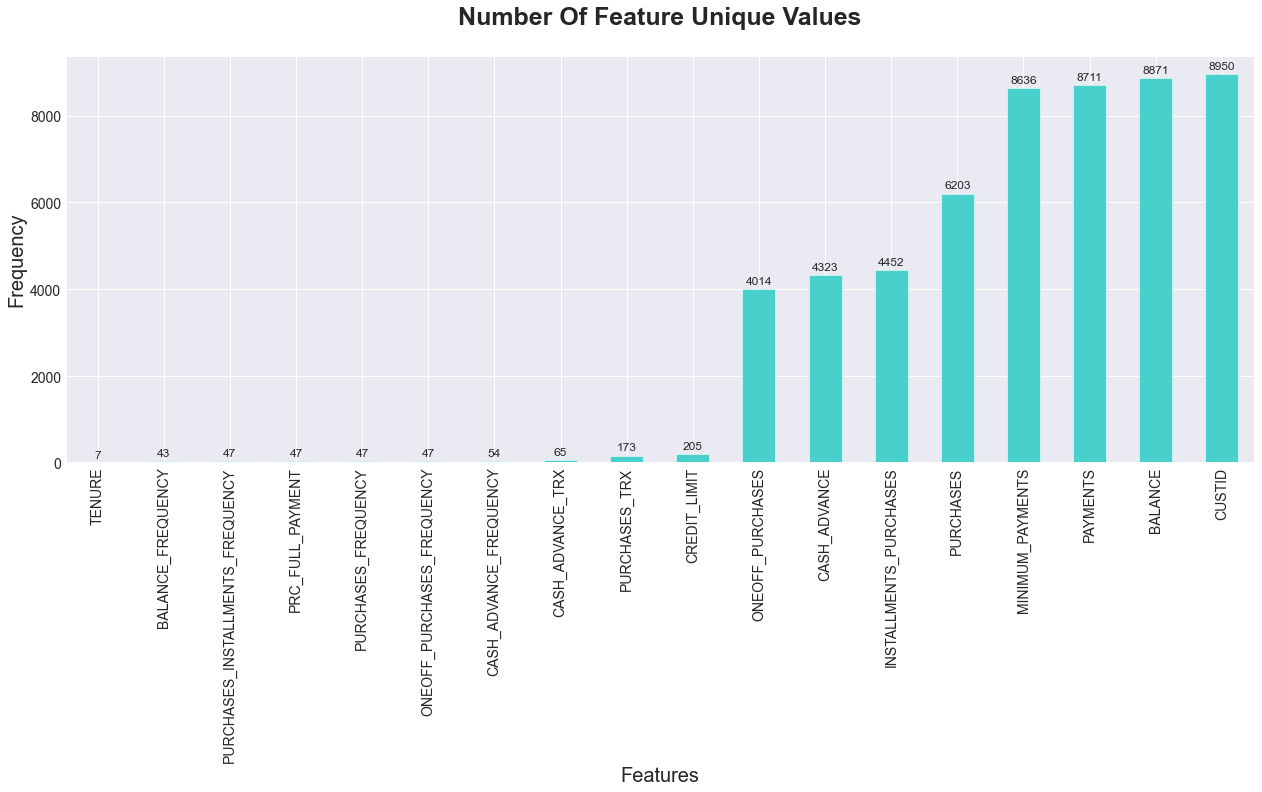

In [9]:
df1_value_counts = df1.nunique()
ax = df1_value_counts.sort_values().plot.bar(figsize = (19,7), color = "mediumturquoise")
set_freq_label(ax, digitSize = 12, padding = 3)
plt.title("Number Of Feature Unique Values", fontweight = "bold", size = 25, y = 1.06)
plt.ylabel("Frequency", size = 20)
plt.xlabel("Features", size = 20)

plt.show()

+ __Result :__
    + The CUSTID acts as an identifier __it should be removed__
    + All the features are continuous in reality, but __the TENURE feature is continous because it refers to the length of time <br>  that an individual has
held a particular job or position, but as a result of having small amount of unique value i will <br>
not consider it as continuous features for analysis, it is considered as a discrete variable__

__Removing the CUSTID feature :__

In [10]:
df1.drop("CUSTID", axis = 1, inplace = True)

## 4.4 | Continuous Feature Splitting

In [11]:
sorted_value_counts = df1_value_counts.sort_values()

__splitting :__

In [12]:
cont_vars = sorted_value_counts.loc["BALANCE_FREQUENCY" : "BALANCE"].index

In [13]:
df1[cont_vars].head()

BALANCE_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  PRC_FULL_PAYMENT  \
0           0.818182                          0.083333          0.000000   
1           0.909091                          0.000000          0.222222   
2           1.000000                          0.000000          0.000000   
3           0.636364                          0.000000          0.000000   
4           1.000000                          0.000000          0.000000   

   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
0             0.166667                    0.000000                0.000000   
1             0.000000                    0.000000                0.250000   
2             1.000000                    1.000000                0.000000   
3             0.083333                    0.083333                0.083333   
4             0.083333                    0.083333                0.000000   

   CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  ONEOFF_PURCHASES  \
0                 0              2        1000.0              0.00   
1                 4              0        7000.0              0.00   
2                 0             12        7500.0            773.17   
3                 1              1        7500.0           1499.00   
4                 0              1        1200.0             16.00   

   CASH_ADVANCE  INSTALLMENTS_PURCHASES  PURCHASES  MINIMUM_PAYMENTS  \
0      0.000000                    95.4      95.40        139.509787   
1   6442.945483                     0.0       0.00       1072.340217   
2      0.000000                     0.0     773.17        627.284787   
3    205.788017                     0.0    1499.00               NaN   
4      0.000000                     0.0      16.00        244.791237   

      PAYMENTS      BALANCE  
0   201.802084    40.900749  
1  4103.032597  3202.467416  
2   622.066742  2495.148862  
3     0.000000  1666.670542  
4   678.334763   817.714335

## 4.5 | Discrete Feature Splitting

In [14]:
disc_vars = df1.drop(cont_vars, axis = 1).columns

In [15]:
df1[disc_vars].head()

TENURE
0      12
1      12
2      12
3      12
4      12

# 5 | Data Cleansing

## 5.1 | Outlier Detection

In [16]:
len(cont_vars)

16

__Plotting the Numercial Features :__

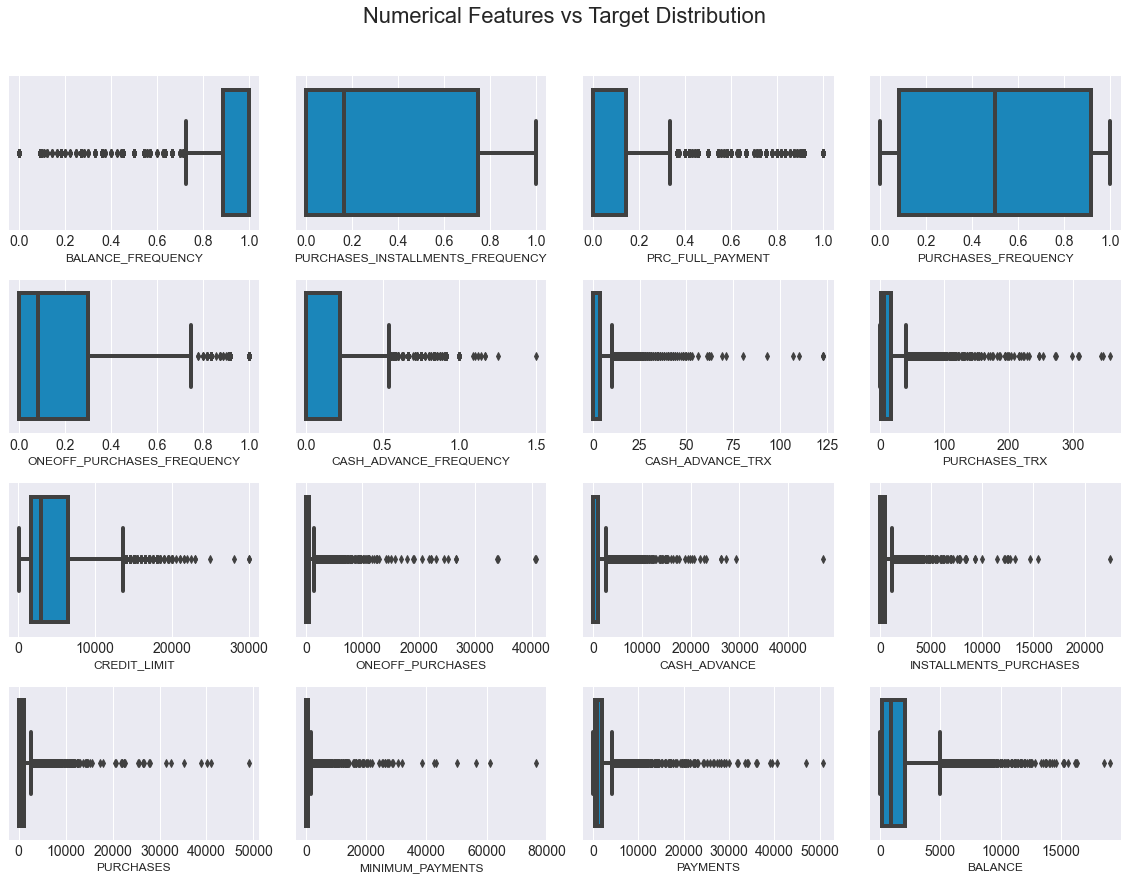

In [17]:
plt.figure(figsize = (16,12))
for idx, col in enumerate(cont_vars):
    plt.subplot(4, 4, idx + 1)
    sns.boxplot(x = col, data = df1)
    plt.xlabel(col, size = 12)
plt.suptitle('Numerical Features vs Target Distribution', fontsize=22, y = 1.02)
plt.tight_layout()                     
plt.show()

+ __There are some significant outliers like noise in ( INSTALLMENTS_PURCHASES, CASH_ADVANCE ), <br>
i will check them below__
+ __All the features have positive skew disturbutions which outliers are pushing the box to the left__

__Significant outlier position :__

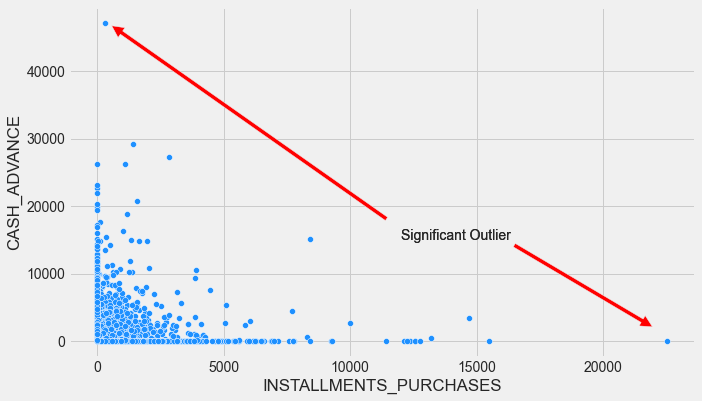

In [18]:
plt.style.use("fivethirtyeight")

plt.figure(figsize = (10,6))
sns.scatterplot(x = "INSTALLMENTS_PURCHASES", y = "CASH_ADVANCE", data = df1, color = "dodgerblue")
plt.annotate("Significant Outlier", xy = (100, 48000),xytext = (12000, 15000), arrowprops=dict(facecolor='red', shrink=0.04))
plt.annotate("Significant Outlier", xy = (22000, 2000),xytext = (12000, 15000), arrowprops=dict(facecolor='red', shrink=0.01))
plt.show()

###  INSTALLMENTS_PURCHASES

__The significant outlier is where > 20000 :__

In [19]:
df1[df1.INSTALLMENTS_PURCHASES > 20000]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5260  4060.710208           0.727273    22500.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5260                 22500.0           0.0                  0.5   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5260                         0.0                          0.416667   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5260                     0.0                 0             12       23000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5260  8760.860264       1645.535202               0.0      12

__Plotting its status :__

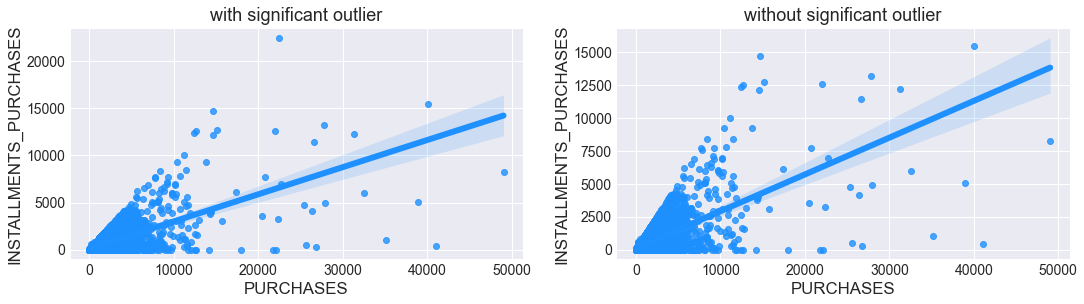

In [20]:
sns.set_style("darkgrid")
plt.figure(figsize = (16, 4))
plt.subplot(1,2,1)
sns.regplot(x = "PURCHASES", y = "INSTALLMENTS_PURCHASES", data = df1, color = "dodgerblue")
plt.title("with significant outlier",size = 18)
plt.subplot(1,2,2)
sns.regplot(x = "PURCHASES", y = "INSTALLMENTS_PURCHASES", data = df1[df1.INSTALLMENTS_PURCHASES < 20000],
            color = "dodgerblue")
plt.title("without significant outlier", size = 18)
plt.show()

__The regression angle changes when the significant outlier is removed, so the significant outlier should be removed__

### CASH_ADVANCE

__There is a significant outlier where CASH_ADVANCE > 40000__

In [21]:
df1[df1.CASH_ADVANCE > 40000]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2159  10905.05381                1.0     431.93             133.5   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2159                  298.43   47137.21176             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2159                        0.25                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2159                     1.0               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2159  39048.59762       5394.173671               0.0      12

__Explanation :__
   + Generally, cash advances cannot bigger than credit limits, because a credit limit <br>  is the maximum amount of credit that a credit card issuer allows a borrower to use
   + __These noise data where CASH_ADVANCE is bigger than CREDIT_LIMIT should be removed or replaced later__

__The percentage value of noise data in CASH_ADVANCES :__

In [22]:
round((df1[df1.CASH_ADVANCE > df1.CREDIT_LIMIT].shape[0] / df1.shape[0]) * 100)

5

## 5.2 | Missing Value

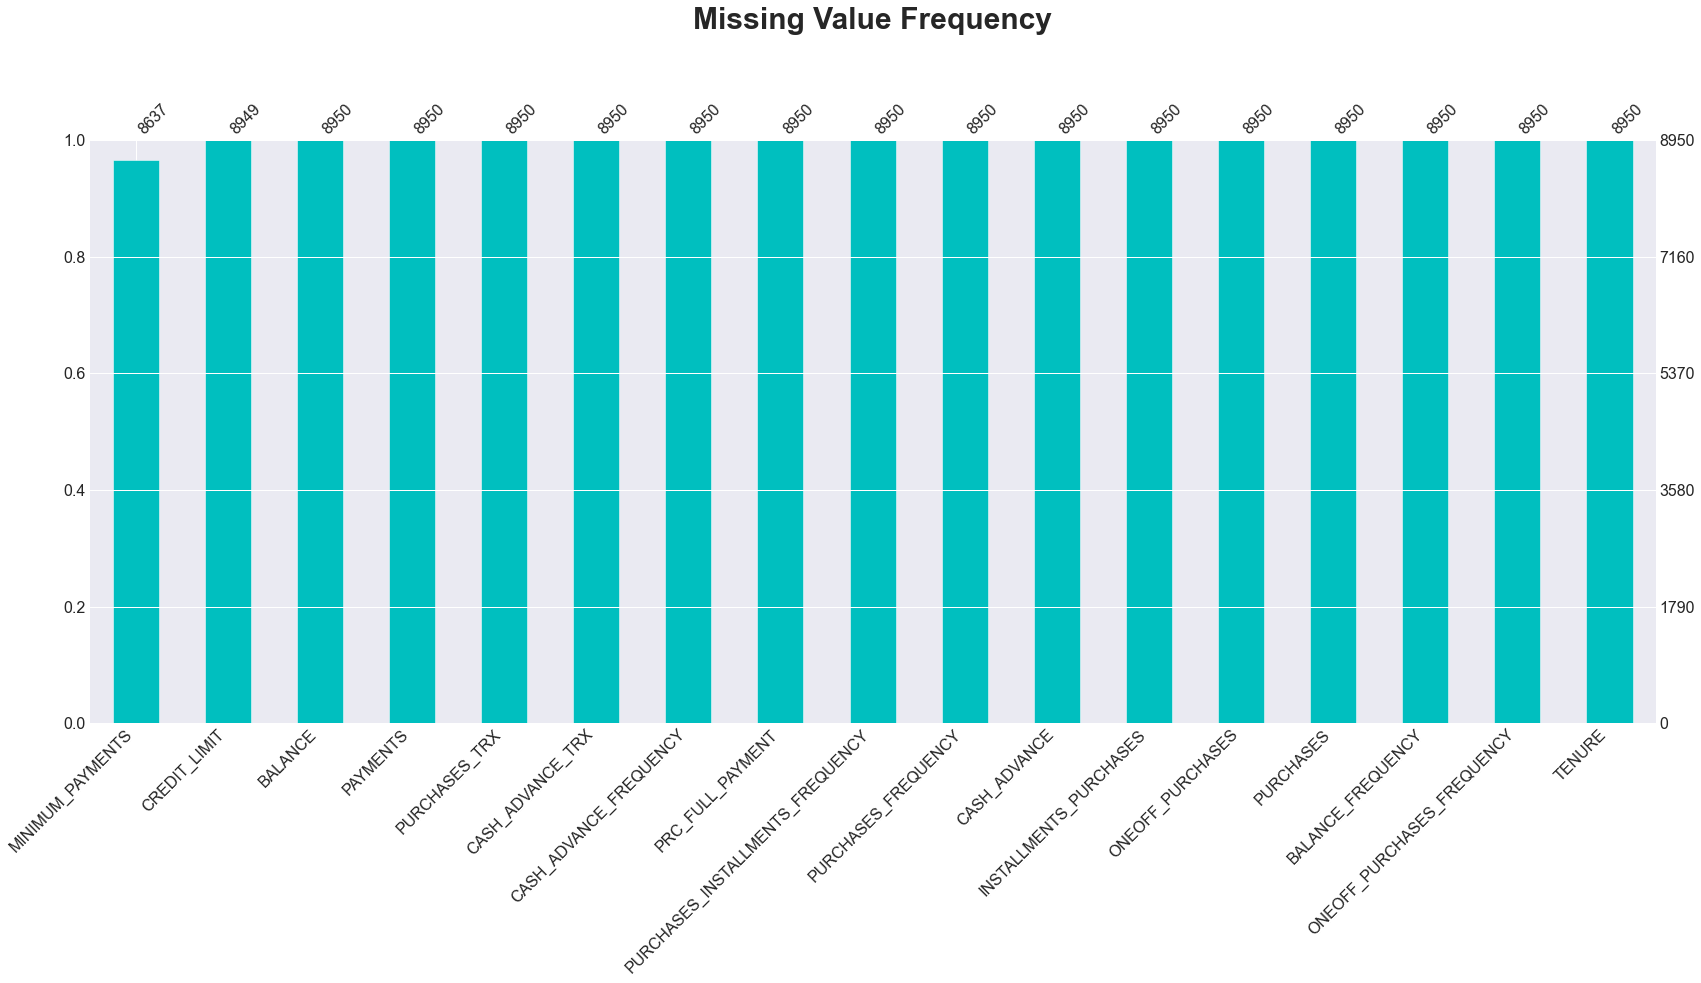

In [23]:
msno.bar(df1, color = "c", sort = "ascending")
plt.title("Missing Value Frequency", y = 1.18, fontweight = "bold", size = 30)
plt.show()

__There are 313 missing values in MINIMUM_PAYMENTS and  1 in CREDIT_LIMIT__

### CREDIT_LIMIT

In [24]:
df1[df1.CREDIT_LIMIT.isna().values]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

__There is just one sample with missing value in credit limit so i will remove it__

In [25]:
df1 = df1.dropna(subset = ["CREDIT_LIMIT"])

### MINIMUM_PAYMENTS

__missing values :__

In [26]:
df1[df1.MINIMUM_PAYMENTS.isna().values].head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3   1666.670542           0.636364     1499.0            1499.0   
45  2242.311686           1.000000      437.0              97.0   
47  3910.111237           1.000000        0.0               0.0   
54     6.660517           0.636364      310.0               0.0   
55  1311.995984           1.000000     1283.9            1283.9   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                      0.0    205.788017             0.083333   
45                   340.0    184.648692             0.333333   
47                     0.0   1980.873201             0.000000   
54                   310.0      0.000000             0.666667   
55                     0.0      0.000000             0.250000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                     0.083333                          0.000000   
45                    0.083333                          0.333333   
47                    0.000000                          0.000000   
54                    0.000000                          0.666667   
55                    0.250000                          0.000000   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                 0.083333                 1              1        7500.0   
45                0.166667                 2              5        2400.0   
47                0.500000                 7              0        4200.0   
54                0.000000                 0              8        1000.0   
55                0.000000                 0              6        6000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3     0.000000               NaN               0.0      12  
45    0.000000               NaN               0.0      12  
47    0.000000               NaN               0.0      12  
54  417.016763               NaN               0.0      12  
55    0.000000               NaN               0.0      12

In [27]:
df1.MINIMUM_PAYMENTS.describe()

count     8636.000000
mean       864.304943
std       2372.566350
min          0.019163
25%        169.163545
50%        312.452292
75%        825.496463
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

__IterativeImputer method :__
   + IterativeImputer is a machine learning algorithm used to impute missing values in datasets
   + The IterativeImputer algorithm works by modeling each feature with missing values as a function of other features in the dataset. It does this by first filling in missing values with an initial estimate, such as the mean or median of the feature. It then fits a regression model to the data and uses this model to impute missing values. This process is repeated multiple times until convergence, meaning that the imputed values are stable and do not change significantly with each iteration.
   + __Advantages :__
       - One of the key benefits of the IterativeImputer algorithm is that it can handle missing values in a variety of formats, including continuous and categorical data. Additionally, it is capable of imputing missing values in a way that preserves the underlying distribution of the data, which is important for maintaining the statistical properties of the dataset.
   + __Disadvantages :__
       - In some cases, it may not be able to accurately impute missing values if the underlying relationship between features is too complex or if there are too many missing values in the dataset

__I split the the most important or nearest features to MINIMUM_PAYMENTS to participate in this process ( IterativeImputer ) :__

In [28]:
coefficients = df1.corr(method = "spearman")["MINIMUM_PAYMENTS"].sort_values(ascending = False)
result = coefficients[coefficients > 0.4]
print(result,"\n", "*" * 50, sep = "\n")    
print(f"\nthe amount of the close correlation feature is {len(result) - 1}")

MINIMUM_PAYMENTS          1.000000
BALANCE                   0.899789
BALANCE_FREQUENCY         0.502278
CASH_ADVANCE              0.481772
CASH_ADVANCE_TRX          0.472312
CASH_ADVANCE_FREQUENCY    0.456057
Name: MINIMUM_PAYMENTS, dtype: float64


**************************************************

the amount of the close correlation feature is 5


__There is a parameter named n_nearest_features in IterativeImputer which identify the number of the nearest features to MINIMUM_PAYMENTS__

__Hyperparameter tuning :__

In [29]:
# imputer = IterativeImputer(random_state=0, n_nearest_features = 5, min_value = 0)
# param_grid = {
#         'max_iter': [100, 1000, 10000],
#         'imputation_order': ['ascending', 'descending', "roman"],
#         'skip_complete': [True, False],
#         'initial_strategy': ['median', 'most_frequent']
# }

# grid_search = GridSearchCV(imputer, param_grid = param_grid, cv = 5, scoring = "neg_mean_squared_error",
#                           verbose = 0)
# grid_search.fit(df1)

__Point :__ 
   * __Hyperparameter tuning in IterativeImputer is so expensive, it takes about 5 min, so <br>
   by trial and error, i have got ( max_iter = 100, imputation_order = "ascending", skip_complete = True , initial_strategy = "median" )__

In [30]:
imputer = IterativeImputer(random_state=0, n_nearest_features = 5, min_value = 0,
                          max_iter = 100, imputation_order = "ascending", skip_complete = True,
                          initial_strategy = "median")
df2 = pd.DataFrame(imputer.fit_transform(df1), columns = imputer.feature_names_in_)

__Plotting the result :__

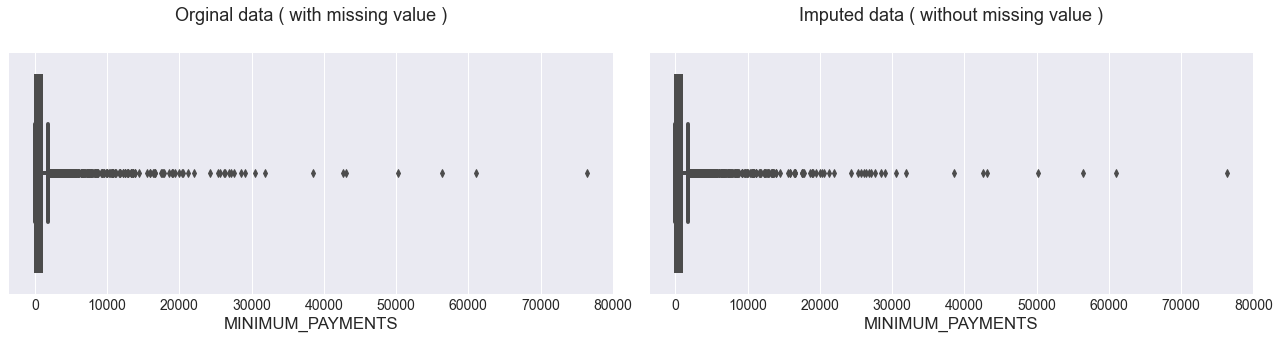

In [31]:
plt.figure(figsize = (18, 5))
plt.subplot(121)
sns.boxplot(x = "MINIMUM_PAYMENTS" , data = df1, color = "orange")
plt.title("Orginal data ( with missing value )", size = 18, y = 1.1)
plt.subplot(122)
sns.boxplot(x = "MINIMUM_PAYMENTS" , data = df2, color = "orange")
plt.title("Imputed data ( without missing value )", size = 18, y = 1.1)
plt.tight_layout()
plt.show()

__There is not much difference between orginal data and the imputed data, which means that, the imputation was good__

## 5.3 | Duplicated Rows

In [32]:
df1.duplicated().sum()

0

__There is no duplicated row in this dataset__

## 5.4 | Outlier Cleaning

__Point :__
   + __There are two necessary significant outliers which should be removed__

### INSTALLMENTS_PURCHASES :

__Region 1_1 :__

In [33]:
region1_1 = df2[df2.INSTALLMENTS_PURCHASES > 20000]
region1_1

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5259  4060.710208           0.727273    22500.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5259                 22500.0           0.0                  0.5   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5259                         0.0                          0.416667   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5259                     0.0               0.0           12.0       23000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5259  8760.860264       1645.535202               0.0    12.0

__Dropping :__

In [34]:
df2.drop(region1_1.index, inplace = True)

### CASH_ADVANCE :

__Region 1_1 :__

In [35]:
region2_2 = df2[df2.CASH_ADVANCE > df2.CREDIT_LIMIT]

__Plotting the region :__

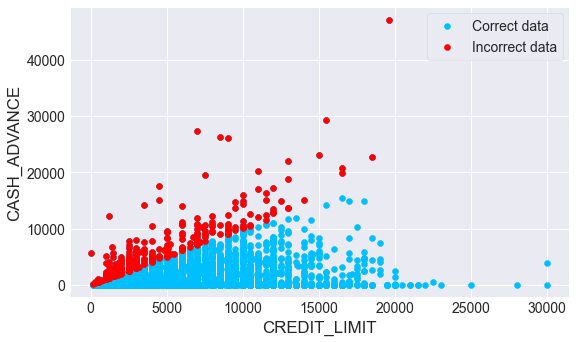

In [36]:
plt.figure(figsize = (8, 5))
plt.scatter("CREDIT_LIMIT", "CASH_ADVANCE", data = df2, label = "Correct data", color = "deepskyblue")
plt.scatter("CREDIT_LIMIT", "CASH_ADVANCE", data = df2[df2.CASH_ADVANCE > df2.CREDIT_LIMIT], color = "r",
           label = "Incorrect data")
plt.ylabel("CASH_ADVANCE")
plt.xlabel("CREDIT_LIMIT")
plt.legend()
plt.show()

__Shape :__

In [37]:
print(f"{round((region2_2.shape[0] / df2.shape[0]) * 100)}%")

5%


+ There is just 5% of the data is incorret in CASH_ADVANE
+ It is required to remove them because both they are noise and small

__Dropping :__

In [38]:
df2.drop(region2_2.index, inplace = True)

# 6 | Feature Analyzing

## 6.1 | Continuous Feature Bivariate Frequency

In [39]:
len(cont_vars)

16

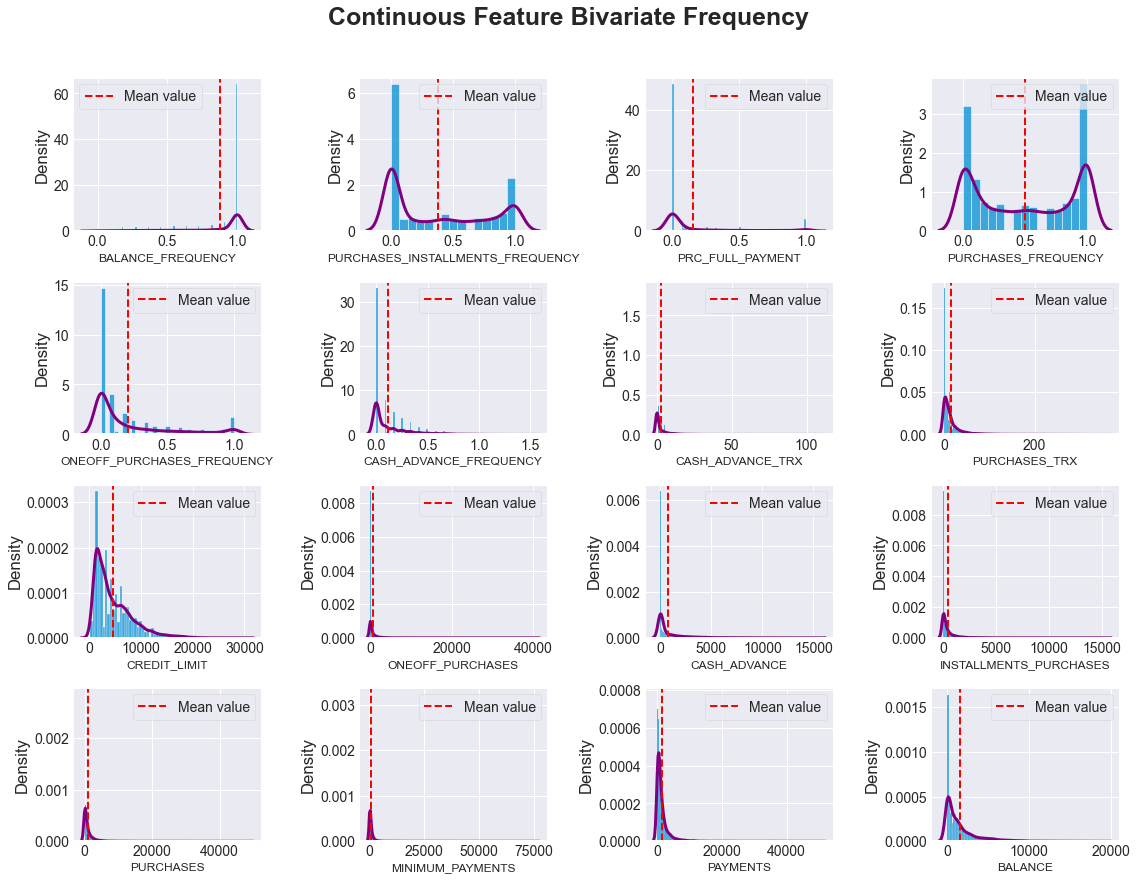

In [40]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(4, 4, figsize = (16,12))
i = 0
j = 0
for idx, col in enumerate(cont_vars):
    i = idx // 4
    j = idx % 4
    sns.histplot(x = col, data = df2, stat = "density", ax = ax[i, j])
    sns.kdeplot(x = col, data = df2, color = "purple", ax = ax[i, j], linewidth = 3)
    ax[i, j].axvline(x = df2[col].mean(), color = "r", ls = "--", label = "Mean value", linewidth = 2)
    ax[i, j].legend()
    ax[i, j].set_xlabel(col, fontsize = 12)
    
plt.suptitle("Continuous Feature Bivariate Frequency", size = 25, y = 1.02, fontweight = "bold")
plt.tight_layout()
plt.show()

+ __BALANCE_FREQUENCY :__
   - it has a negative skew disturbution
+ __PURCHASES_INSTALLMENTS_FREQUENCY / the PURCHASES_FREQUENCY :__
   - they have bimodal disturbution
+ __Others :__
   - Other features except the above have positive skewness disturbution

## 6.2 | Discrete Feature Bivariate Frequency

__Length of ordinal features :__

In [41]:
len(disc_vars)

1

In [42]:
df2[disc_vars].nunique()

TENURE    7
dtype: int64

In [43]:
fig = px.pie(df2, "TENURE", title = "TENURE")
fig.show()

__Result :__
   - it shows the lack of balance in its categories
   - The most frequent one is the 12 value, which says that 85% of the customers are Loyal <br> to their balances and purchases and etc.. that is why their accounts has been remained for 12 months

# 7 | Correlation Analysis

__Some explanations of this plot :__
   + As a result, There are some ordinal features in this dataset, using Spearman can make more sense<br> bacause it can both handle lineary and non-linear relation between features than Pearson correlation
   + Unlike Pearson correlation, which is based on the linear relationship between two variables, Spearman <br> correlation is based on the ranks of the values of each variable. As a result, the influence of extreme values<br> or outliers is reduced, and Spearman correlation is less affected by non-normality or skewness in the data.<br> Therefore, Spearman correlation may be a better choice than Pearson correlation when the data contains<br> outliers or is not normally distributed

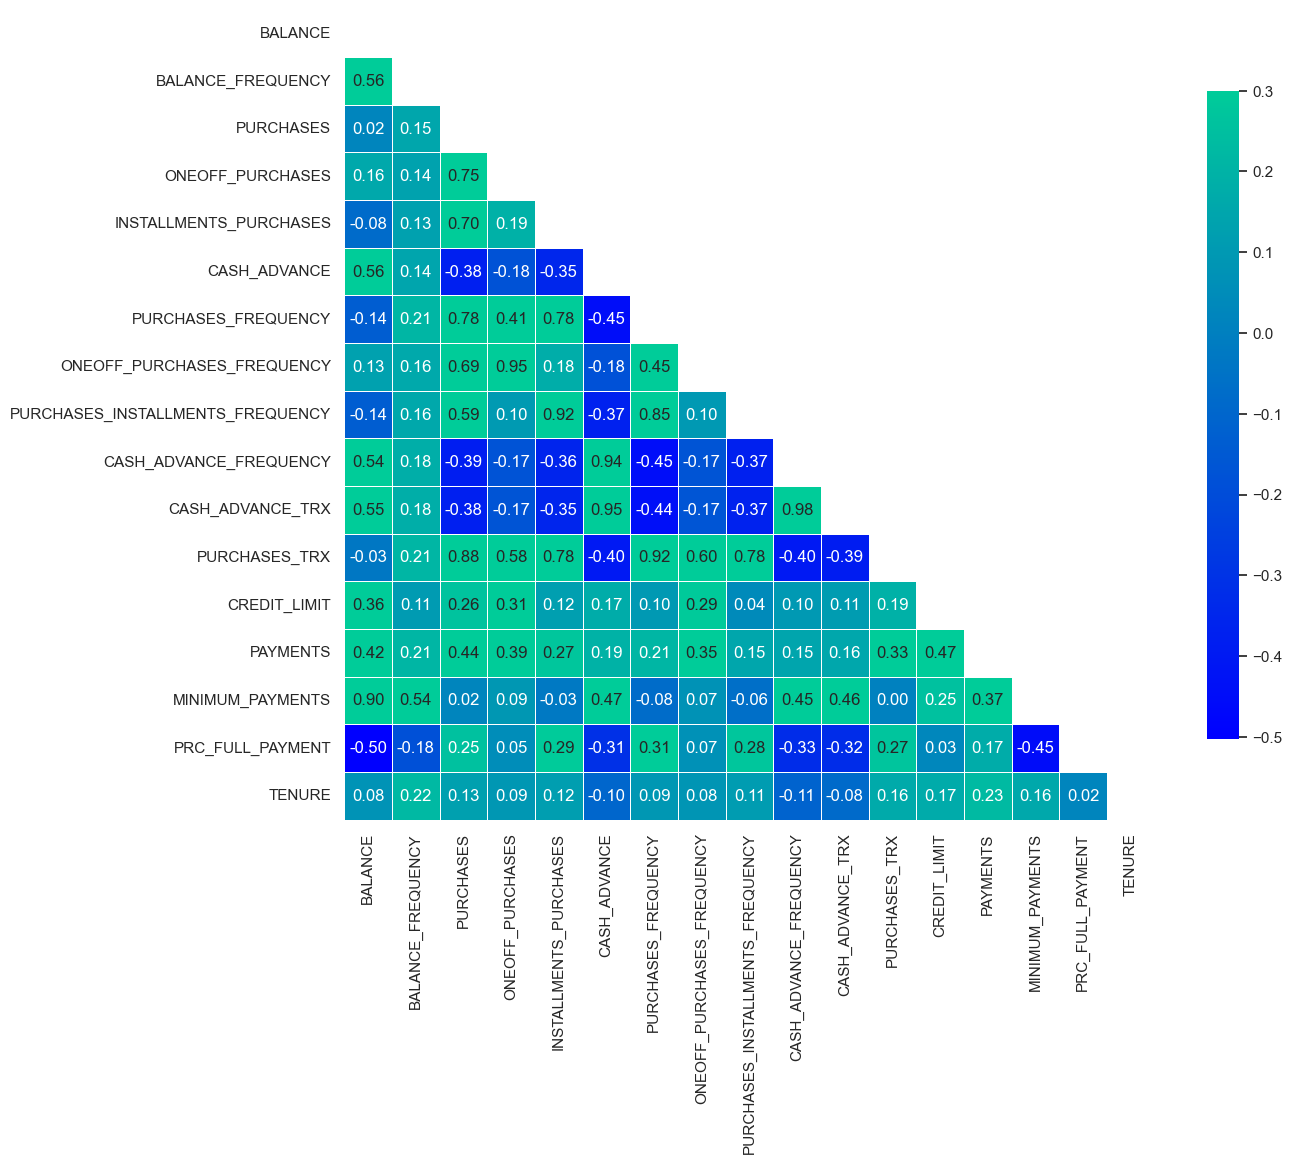

In [44]:
corr = df2.corr(method = "spearman")

sns.set(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10), dpi = 100)
sns.heatmap(corr, mask = mask, cmap= "winter", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, annot = True, fmt = ".2f")
plt.show()

## 7.1 | Feature Importance

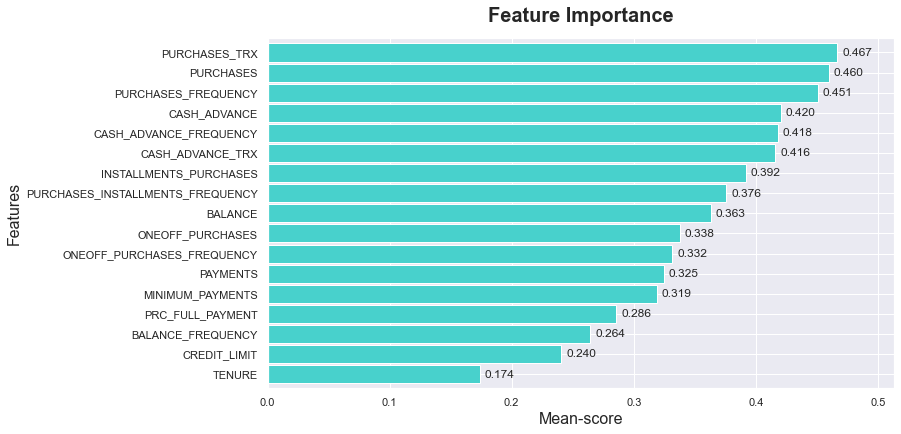

In [45]:
sns.set_style("darkgrid")
plt.figure(figsize = (10,6))
feature_correlation_mean = corr.abs().mean().sort_values()
ax = feature_correlation_mean.plot.barh(width = 0.9, color = "mediumturquoise")
set_freq_label(ax, fmt = "%.3f", digitSize = 12, padding = 5)
plt.margins((0.1))
plt.ylabel("Features", size = 16)
plt.xlabel("Mean-score", size = 16)
plt.title("Feature Importance", fontweight = "bold", y = 1.03, size = 20)
plt.show()

+ the order is showing the importancy of the features, __which the PURCHASES_TRX is the most important feature__

# 8 | Data Exploration

__Splitting the combined columns which gives more information :__

In [46]:
list_mixed_features = (("CASH_ADVANCE","PURCHASES_TRX"),
                      ("CASH_ADVANCE", "BALANCE"),
                      ("PAYMENTS", "CREDIT_LIMIT"),
                      ("ONEOFF_PURCHASES",  "CREDIT_LIMIT"),
                      ("BALANCE_FREQUENCY", "MINIMUM_PAYMENTS"),
                      ("PURCHASES_TRX", "BALANCE"))

__Length of the combined features :__

In [47]:
len(list_mixed_features)

6

## 8.1 | Important Combined Features

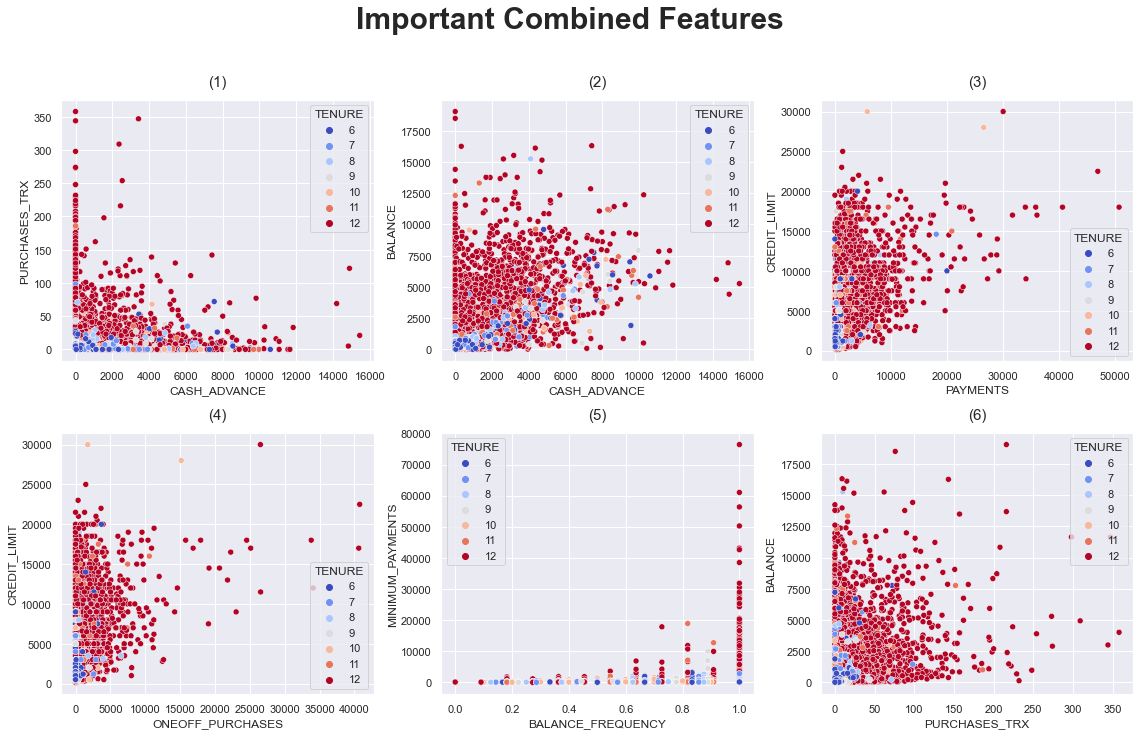

In [48]:
plt.figure(figsize = (16, 10))
for idx, (col1, col2) in enumerate(list_mixed_features):
    plt.subplot(2,3, idx + 1)
    sns.scatterplot(x = col1, y = col2, data = df2, hue = "TENURE", palette = "coolwarm")
    plt.xlabel(col1, fontsize = 12)    
    plt.ylabel(col2, fontsize = 12)
    plt.title(f"({idx + 1})", size = 15, y = 1.03)
plt.suptitle("Important Combined Features", size = 30, fontweight = "bold", y = 1.02)
plt.tight_layout()
plt.show()

__Result :__
   - __Point :__
       + High tenures shows that the customers are valuable
   - __(1) :__
       + Customers who get more cash advances may less purchase sth by credit card
   - __(2) :__
       + Getting more cash advance can increase your balance
   - __(3) :__
       + Customers who pay more will have more time on their account and more credit limit
   - __(4) :__
       + Customers who make more one-time purchases will have more time on their account and a higher credit limit
   - __(5) :__
       + It shows that with increasing the balance frequency the minimum payments of the balances increase too
       and the accounts of customers will remain longer by paying more balance
   - __(6) :__
       + Here it shows that with high purchases trx, the balance will decrease<br>
       as the purchases trx increases, it causes to make the customers' account to remain longer <br>
       high purchases trx can be good if the balance decreases otherwise it is not good

## 8.2 | Scatter 3D Plots

In [58]:
fig = px.scatter_3d(df2, x = "PURCHASES", y = "CREDIT_LIMIT", z = "PAYMENTS", color = "TENURE",
                    title = "How Purchases & Payments affect on customers's Credit limit within their Tenure")
fig.show()

+ The plot shows that if the customers' payments increase at the same rate as their purchases __their credit limit increases__ <br>and the density of high-tenure customers increases as the three specified features increase

In [50]:
fig = px.scatter_3d(df2, x = "BALANCE_FREQUENCY", y = "CASH_ADVANCE_TRX", z = "CREDIT_LIMIT",color = "TENURE",
                   title = "How Balance frequency & Cash advance trx affect on customers's Credit limit within their Tenure")
fig.show()

+ __Point :__
    - if the customer has a history of paying back cash advances promptly and reliably, then high cash advance transactions <br> may indicate that the customer has a strong need for cash and is a valuable customer for your business
+ Here the plot shows that by increasing the cash advance trx in the way of high balance frequency ( high balance frequency <br> means that the customer is loyal and valuable ), __the credit limit increases__ and the density of customers who have high <br> tenure increases too

## 8.3 | Box Plots

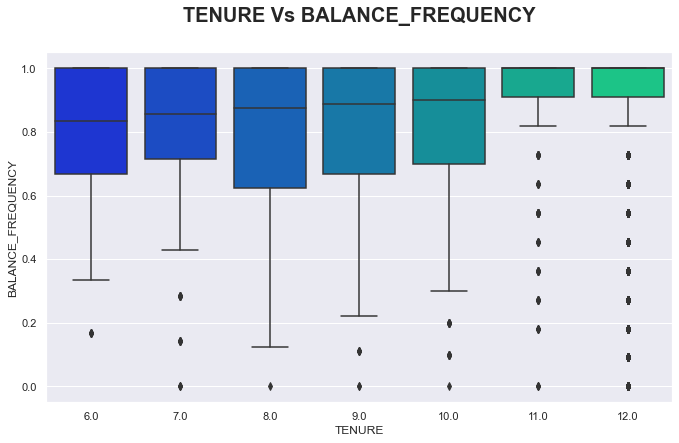

In [51]:
plt.figure(figsize = (10,6))
sns.boxplot(x = "TENURE", y = "BALANCE_FREQUENCY", data = df2, palette = "winter")
plt.title("TENURE Vs BALANCE_FREQUENCY", size = 20, y = 1.07, fontweight = "bold")
plt.show()

+ The higher the balancing frequency, the longer the customer tenure

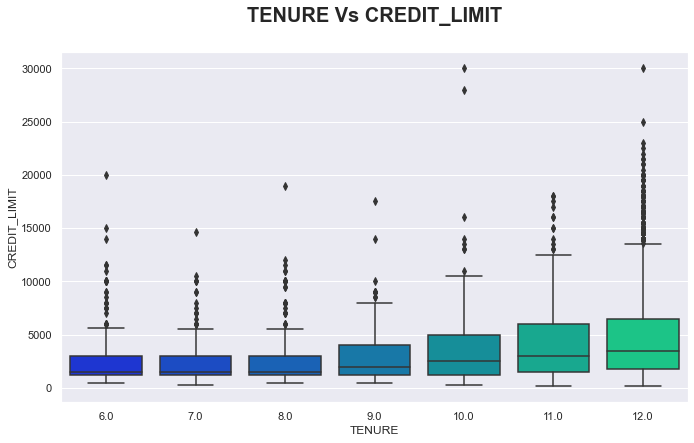

In [52]:
plt.figure(figsize = (10,6))
sns.boxplot(x = "TENURE", y = "CREDIT_LIMIT", data = df2, palette = "winter")
plt.title("TENURE Vs CREDIT_LIMIT", size = 20, y = 1.07, fontweight = "bold")
plt.show()

+ The higher the credit limit, the longer the customer tenure

## 8.4 : Clustering Status

__Explanation :__
   - The BALANCE_FREQUENCY & PURCHASES_INSTALLMENTS_FREQUENCY & PRC_FULL_PAYMENT & PURCHASES_FREQUENCY & ONEOFF_PURCHASES_FREQUENCY & CASH_ADVANCE_FREQUENCY have almost discrete disturbutions although they are <br> continuous variables so  they cannot help to find clusters within the most important feature

In [53]:
features_cluster_status = cont_vars.drop(["BALANCE_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY", 
                                          "PRC_FULL_PAYMENT", "PURCHASES_FREQUENCY", 
                                          "ONEOFF_PURCHASES_FREQUENCY", "CASH_ADVANCE_FREQUENCY"])

In [54]:
len(features_cluster_status.drop("PURCHASES_TRX"))

9

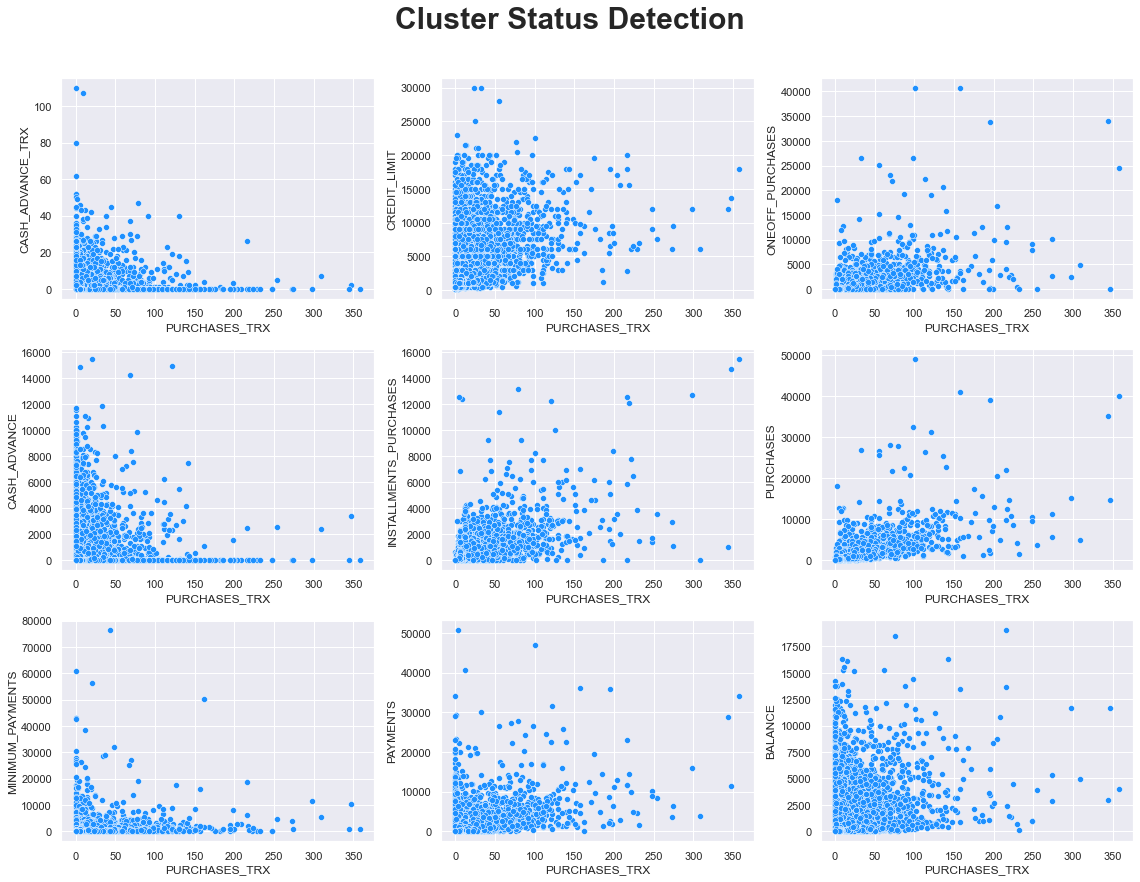

In [55]:
plt.figure(figsize = (16, 12))
for idx, col in enumerate(features_cluster_status.drop("PURCHASES_TRX")):
    ax = plt.subplot(3,3, idx + 1)
    sns.scatterplot(x = "PURCHASES_TRX", y = col, data = df2, color = "dodgerblue")
    plt.ylabel(col, fontsize = 12)
    plt.xlabel("PURCHASES_TRX", fontsize = 12)
plt.suptitle("Cluster Status Detection", size = 30, fontweight = "bold", y = 1.02)
plt.tight_layout()
plt.show()

+ __The shapes of data in these plots are kind of positive skew disturbution with some outliers__

__One of the example of the above plots to show the data shape :__

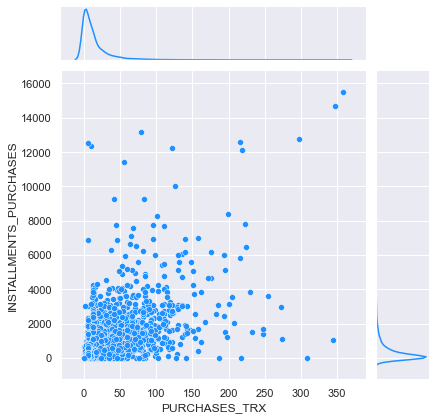

In [56]:
g = sns.JointGrid(data = df2, x = "PURCHASES_TRX", y = "INSTALLMENTS_PURCHASES")
g.plot(sns.scatterplot,sns.kdeplot, color = "dodgerblue")
plt.show()

__it has a positive skew disturbution__

# 9 | Feature Scaling

__Local Outlier Factor (LOF) :__
   + The LOF algorithm works by analyzing the local density of points in a dataset. Points that are located in regions of low density are considered to be more anomalous than points that are located in regions of high density. Specifically, the algorithm computes a score for each data point that reflects the extent to which that point is an outlier relative to its local neighborhood

The reason why i use LOF here is that if i used it in the outlier detection step, the indexes would updates as removing missing values and etc...

In [57]:
def LOF(df, n_neighbors = 30, contamination = 0.08):
    clf = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
    preds = clf.fit_predict(df)
    outliers_lof = np.where(preds == -1)[0]
    return outliers_lof

__contamination parameter of LOF :__
  + "contamination" refers to the proportion of outliers in the dataset
  + __Point :__
      * by trial and error, i have understood that the 0.06 value of contamination is better than other

In [58]:
indexes = LOF(df2, contamination = 0.06)
upt_df = df2.drop(df2.iloc[indexes].index)

__This is the amount of outliers :__

In [59]:
len(indexes)

513

__Scaling :__

In [60]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(upt_df)
df_scaled = pd.DataFrame(X_scaled, columns = scaler.feature_names_in_)

# 10 | Clustering

## 10.1 | Important Fucntions In Clustering

In [61]:
def cluster_evaluation(df, fmt = "%g"):
    
    plt.style.use("fivethirtyeight")
    
    plt.figure(figsize = (14, 10))
    plt.subplot(221)
    max_value = df.groupby("cluster")["sill_score"].max()
    ax = max_value.plot.bar(color = "mediumturquoise")
    set_freq_label(ax, padding = 3, digitSize = 12, fmt = fmt)
    plt.ylabel("silhouette_score")

    plt.subplot(222)
    max_value = df.groupby("cluster")["calinski_score"].max()
    ax = max_value.plot.bar(color = "mediumturquoise")
    set_freq_label(ax, padding = 3, digitSize = 12, fmt = fmt)
    plt.ylabel("calinski_harabasz_score")

    plt.subplot(212)
    min_value = df.groupby("cluster")["davies_bouldin_score"].min()
    ax = min_value.plot.bar(width = 0.23, color = "mediumturquoise")
    set_freq_label(ax, padding = 3, digitSize = 12, fmt = fmt)
    plt.ylabel("davies_bouldin_score")
    
    
    plt.suptitle("Cluster Detection", size = 25, y = 1.02)
    plt.tight_layout()
    
    plt.show()

# ------------------------------------------------------------------------------------------------------------

def evaluation (df, labels):
    
    score1 = round(silhouette_score(df, labels),2)
    score2 = round(calinski_harabasz_score(df, labels),2)
    score3 = round(davies_bouldin_score(df, labels),2)
    print("Evaluation Metrics".center(50, "*"), f"silhouette_score : {score1}", 
         f"calinski_harabasz_score : {score2}",
         f"davies_bouldin_score : {score3}", "*" * 50, sep = "\n" * 2 )
    
# ------------------------------------------------------------------------------------------------------------

def plot_cluster_result(df, centroids, cluster_name, centers = True):
    
    plt.style.use("fivethirtyeight")
    plt.figure(figsize = (16,5))
    plt.subplot(121)
    sns.scatterplot(data = df, x = "PURCHASES_TRX", y = "BALANCE", hue = "Cluster", alpha = 0.6, 
                   palette = "brg")
    if centers:
        plt.scatter(centroids[:, 11], centroids[:,0], c='orangered', s = 150)
    plt.subplot(122)
    sns.scatterplot(data = df, x = "PURCHASES_TRX", y = "PAYMENTS", hue = "Cluster", alpha = 0.6, 
                   palette = "brg")
    if centers:
        plt.scatter(centroids[:, 11], centroids[:,13], c='orangered', s=150)
    
    plt.suptitle(f"{cluster_name} Clustering Result", size = 25, fontweight = "bold")
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------------------------------------------------

def cluster_frequency (labels, algo_name):
    
    pie_lables = pd.Series(labels).value_counts()
    fig = px.pie(names = pie_lables.index, values = pie_lables.values,
           width = 550,height = 450, title = f"{algo_name} Cluster Frequency")
    fig.show()
    
# ------------------------------------------------------------------------------------------------------------

def hyperparameter_tuning(df, model, param_grid, scoring, n_jobs = None) :
    
    grid_search = GridSearchCV(model, param_grid, scoring = scoring, n_jobs = n_jobs)
    grid_search.fit(df)
    print("-" * 30, f"Best parameters : {grid_search.best_params_}", "-" * 30, sep = "\n")
    return grid_search.best_estimator_

## 10.2 | Gaussian Mixture Model ( GMM )

__Hypeparameters :__

In [62]:
n_components_range = [2,3,4, 5, 6]
covariance_type_range = ['tied', 'diag']
methods = ["kmeans",  "random"]
max_iter = [100, 1000, 10000]

__Clustering :__

In [63]:
df_gmm_scores = []
for p in product(n_components_range, covariance_type_range, methods, max_iter) :
    Gmm = GaussianMixture(n_components = p[0], covariance_type = p[1],init_params = p[2], max_iter = p[3])
    labels = Gmm.fit_predict(df_scaled)
    score1 = silhouette_score(df_scaled, labels)
    score2 = calinski_harabasz_score(df_scaled, labels)
    score3 = davies_bouldin_score(df_scaled, labels)
    df_gmm_scores.append({"cluster" : len(np.unique(labels)), "covariance_type" : p[1], "init_params" : p[2],
                          "max_iter" : p[3],
                       "sill_score" : score1, "calinski_score" : score2, "davies_bouldin_score" : score3})
df_gmm_scores = pd.DataFrame(df_gmm_scores)

__Cluster detection :__

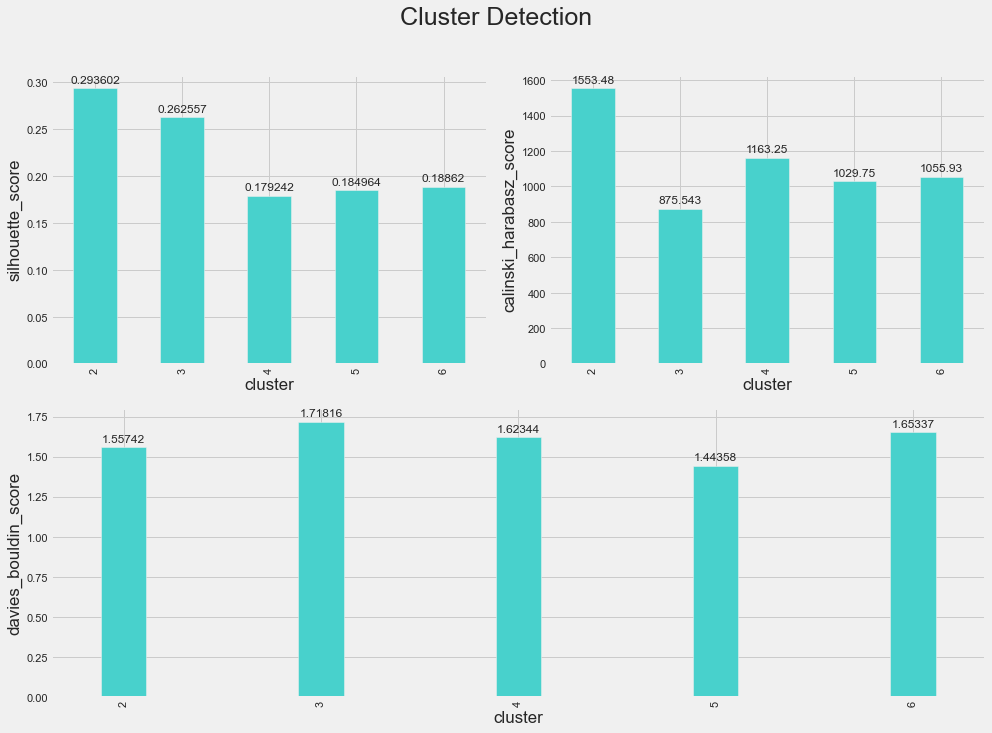

In [64]:
cluster_evaluation(df_gmm_scores)

+ __the majority of the results shows that the two of the metrics are refering to 2 clusters__
+ __it shows that 2 clusters are making better result than others__

In [65]:
df_gmm_scores[df_gmm_scores.cluster == 2]

cluster covariance_type init_params  max_iter  sill_score  calinski_score  \
0         2            tied      kmeans       100    0.293602     1103.131843   
1         2            tied      kmeans      1000    0.184156     1553.475736   
2         2            tied      kmeans     10000    0.183855     1551.219257   
3         2            tied      random       100    0.073843      440.083751   
4         2            tied      random      1000    0.191209      193.378642   
5         2            tied      random     10000    0.146263      567.901552   
6         2            diag      kmeans       100    0.125010     1156.721018   
7         2            diag      kmeans      1000    0.125010     1156.721018   
8         2            diag      kmeans     10000    0.125010     1156.721018   
9         2            diag      random       100    0.163904     1157.061993   
10        2            diag      random      1000    0.109016      900.099959   
11        2            diag      random     10000    0.163941     1160.321428   

    davies_bouldin_score  
0               1.557423  
1               1.995404  
2               1.996478  
3               3.680357  
4               4.144123  
5               3.022957  
6               2.038487  
7               2.038487  
8               2.038487  
9               2.390806  
10              2.634375  
11              2.386983

+ the above table shows that the first row has the best scores on the three metrics, which :
    - the least davies_boulding_score
    - the highest silhouette_score 
    - comparing to the second row, the calinski_harabasz_score is small,<br> but as the majority of the metrics,
    this problem is ignored

In [66]:
gmm = GaussianMixture(n_components = 2, covariance_type = "tied", init_params = "kmeans", max_iter = 100)
labels = gmm.fit_predict(df_scaled)

__Cluster frequency :__

In [67]:
cluster_frequency(labels, "GMM")

__Evaluation :__

In [68]:
evaluation(df_scaled, labels)

****************Evaluation Metrics****************

silhouette_score : 0.18

calinski_harabasz_score : 1551.62

davies_bouldin_score : 2.0

**************************************************


In [69]:
cluster_means = gmm.means_
# inverse the means, because they have been made by the scaled data and we want 
# to analyze them with the non-scaled data
gmm_centroids_inversed = scaler.inverse_transform(cluster_means)

In [70]:
gmm_centroids_inversed

array([[1.65478365e+03, 8.19596157e-01, 2.79487296e+02, 2.16663341e+02,
        6.31732664e+01, 1.02689607e+03, 1.46681318e-01, 7.75118909e-02,
        6.87047558e-02, 1.62862870e-01, 3.57035968e+00, 2.75278896e+00,
        4.14511220e+03, 1.17328916e+03, 7.30916000e+02, 7.89419806e-02,
        1.14929412e+01],
       [1.37595548e+03, 9.40585220e-01, 1.62407053e+03, 9.10096654e+02,
        7.14022152e+02, 4.81456849e+02, 8.75951430e-01, 3.49910999e-01,
        6.90374622e-01, 7.74591000e-02, 1.79902583e+00, 2.72342682e+01,
        4.83350136e+03, 1.76040814e+03, 7.05215268e+02, 2.42062790e-01,
        1.15838566e+01]])

__Adding clusters to the df_gmm :__

In [71]:
df_gmm = upt_df.copy()
df_gmm["Cluster"] = labels

In [72]:
df_gmm.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000               0.0            2.0        1000.0   
1                0.250000               4.0            0.0        7000.0   
2                0.000000               0.0           12.0        7500.0   
3                0.083333               1.0            1.0        7500.0   
5                0.000000               0.0            8.0        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000    12.0        0  
1  4103.032597       1072.340217          0.222222    12.0        0  
2   622.066742        627.284787          0.000000    12.0        1  
3     0.000000        869.548280          0.000000    12.0        0  
5  1400.057770       2407.246035          0.000000    12.0        1

__Cluster result :__

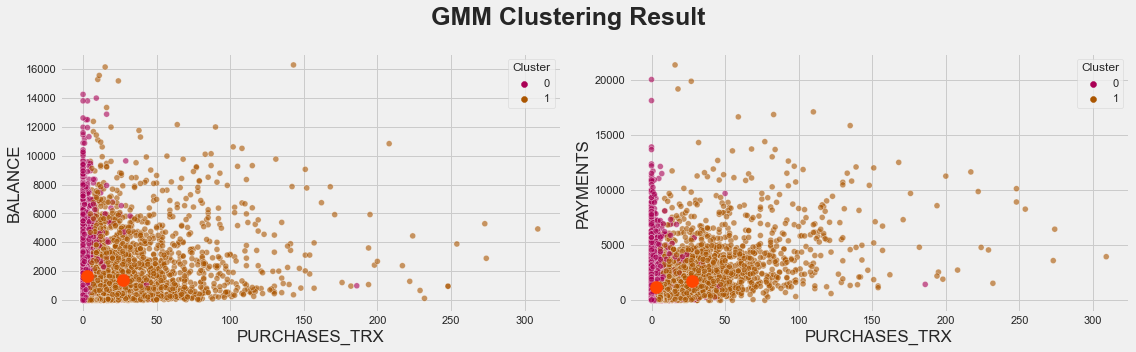

In [73]:
plot_cluster_result(df_gmm, gmm_centroids_inversed, "GMM")

__Finally :__
   * The GMM algorithm accepts __2 clusters__ for this dataset

## 10.3 | MiniBatch Kmeans

__Hyperparameter :__

In [74]:
n_clusters = [2, 5, 10, 20]
batch_size =  [10, 50, 100]
max_iter =  [100, 200, 500]

__Clustering :__

In [75]:
df_mini_batch_scores = []
for p in product(n_clusters, batch_size, max_iter) :
    mini_batch_kmeans = MiniBatchKMeans(n_clusters = p[0], batch_size = p[1], max_iter = p[2])
    mini_batch_kmeans.fit(df_scaled)
    labels = mini_batch_kmeans.predict(df_scaled)
    score1 = silhouette_score(df_scaled, labels)
    score2 = calinski_harabasz_score(df_scaled, labels)
    score3 = davies_bouldin_score(df_scaled, labels)
    df_mini_batch_scores.append({"cluster" : len(np.unique(labels)), "batch_size" : p[1], "max_iter" : p[2],
                       "sill_score" : score1, "calinski_score" : score2, "davies_bouldin_score" : score3})
df_mini_batch_scores = pd.DataFrame(df_mini_batch_scores)

__Cluster detection :__

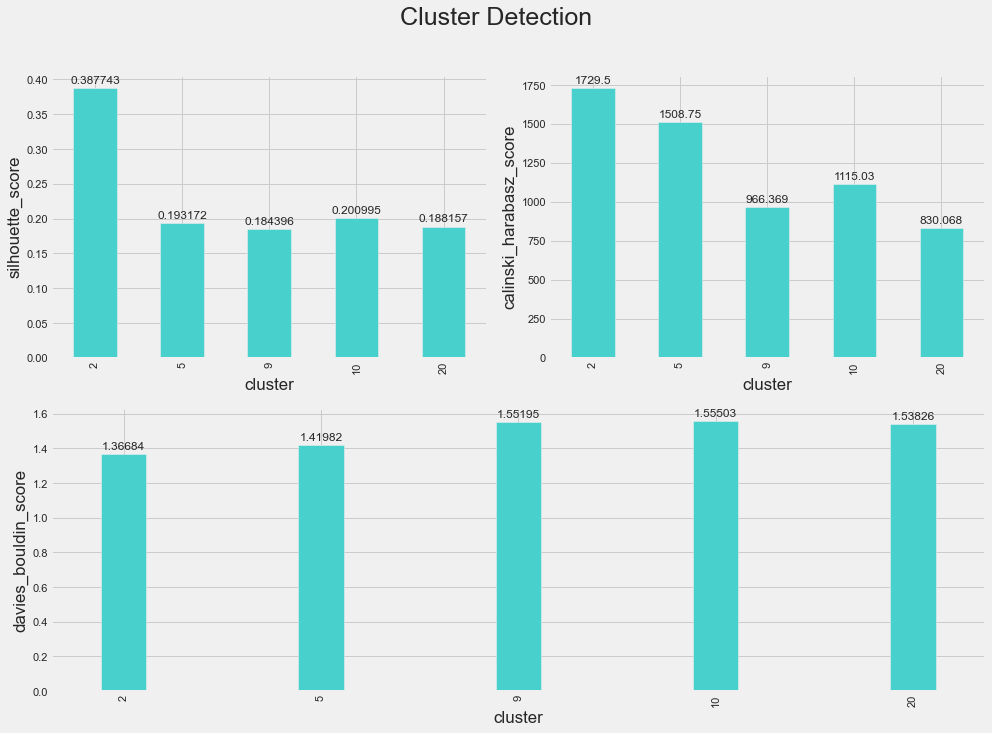

In [76]:
cluster_evaluation(df_mini_batch_scores)

+ __the majority of the results shows that the two of the metrics are refering to 2 clusters__
+ __it shows that 2 clusters are making better result than others__

In [77]:
df_mini_batch_scores[df_mini_batch_scores.cluster == 2]

cluster  batch_size  max_iter  sill_score  calinski_score  \
0        2          10       100    0.268344     1290.722258   
1        2          10       200    0.347324     1663.589070   
2        2          10       500    0.305026     1281.176290   
3        2          50       100    0.324674     1456.240696   
4        2          50       200    0.270724     1727.137123   
5        2          50       500    0.387743     1567.399192   
6        2         100       100    0.201672     1729.503532   
7        2         100       200    0.320054     1705.944804   
8        2         100       500    0.257879     1317.637522   

   davies_bouldin_score  
0              1.703887  
1              1.468196  
2              1.992034  
3              2.037824  
4              1.711521  
5              1.366836  
6              1.901196  
7              1.556418  
8              1.899704

The results are vague, it is a little difficult to understand which one is better, so <br>
I'll get help from hypeparameter tuning

In [78]:
param_grid = {"n_clusters" : [2, 5, 10, 20],
              "batch_size": [10, 50, 100],
              "max_iter": [100, 200, 500]}

__Hyperparameter tuning :__

In [79]:
mini_batch_grid = hyperparameter_tuning(df_scaled, MiniBatchKMeans(), param_grid, silhouette_score)

------------------------------
Best parameters : {'batch_size': 10, 'max_iter': 100, 'n_clusters': 2}
------------------------------


__Predicted labels :__

In [80]:
labels = mini_batch_grid.labels_

__Cluster frequency :__

In [81]:
cluster_frequency(labels, "MiniBatch")

In [82]:
mini_batch_means = mini_batch_grid.cluster_centers_
# inverse the means, because they have been made by the scaled data and we want 
# to analyze them with the non-scaled data
mini_batch_centroids_inversed = scaler.inverse_transform(mini_batch_means)

In [83]:
mini_batch_centroids_inversed

array([[1.53007875e+03, 8.92296250e-01, 4.40047692e+02, 2.51703077e+02,
        1.88344615e+02, 8.43398153e+02, 4.26749962e-01, 1.14019279e-01,
        3.09926192e-01, 1.25797433e-01, 2.72115385e+00, 7.33653846e+00,
        4.13846154e+03, 9.07898576e+02, 6.25642952e+02, 9.06218462e-02,
        1.14711538e+01],
       [1.33713434e+03, 9.48863625e-01, 3.95713125e+03, 2.54302938e+03,
        1.41410187e+03, 4.04109408e+02, 9.73958312e-01, 4.58333375e-01,
        8.33333312e-01, 9.37500000e-02, 2.56250000e+00, 4.30625000e+01,
        4.96562500e+03, 3.88038596e+03, 7.11790813e+02, 2.38194375e-01,
        1.20000000e+01]])

__Adding clusters to the df_ms :__

In [84]:
df_ms = upt_df.copy()
df_ms["Cluster"] = labels

In [85]:
df_ms.tail()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8944   28.493517           1.000000     291.12              0.00   
8945   19.183215           1.000000     300.00              0.00   
8946   23.398673           0.833333     144.40              0.00   
8947   13.457564           0.833333       0.00              0.00   
8948  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8944                  291.12      0.000000             1.000000   
8945                  300.00      0.000000             1.000000   
8946                  144.40      0.000000             0.833333   
8947                    0.00     36.558778             0.000000   
8948                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8944                    0.000000                          0.833333   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.666667   
8947                    0.000000                          0.000000   
8948                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8944                0.000000               0.0            6.0        1000.0   
8945                0.000000               0.0            6.0        1000.0   
8946                0.000000               0.0            5.0        1000.0   
8947                0.166667               2.0            0.0         500.0   
8948                0.333333               2.0           23.0        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
8944  325.594462         48.886365              0.50     6.0        0  
8945  275.861322        159.169123              0.00     6.0        0  
8946   81.270775         82.418369              0.25     6.0        0  
8947   52.549959         55.755628              0.25     6.0        0  
8948   63.165404         88.288956              0.00     6.0        0

__Cluster result :__

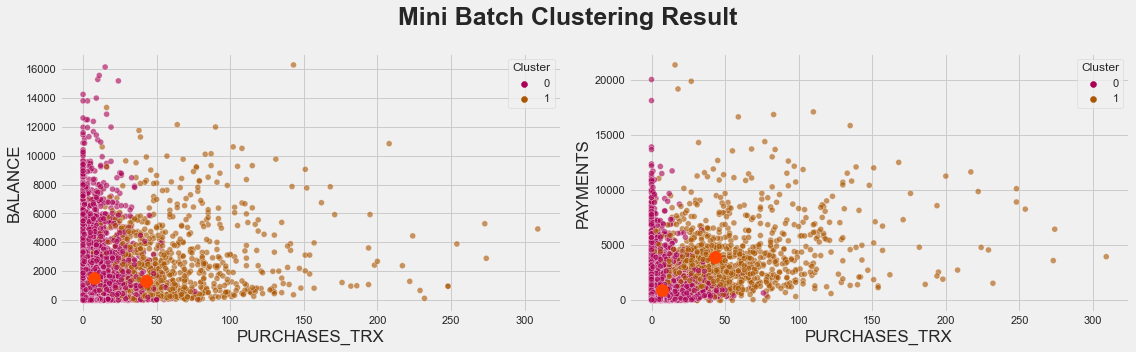

In [86]:
plot_cluster_result(df_ms, mini_batch_centroids_inversed, cluster_name = "Mini Batch")

__Finally :__
   * The MiniBatchKmeans algorithm accepts __2 clusters__ for this dataset

## 10.4 | Mean Shift

__Parameter of estimate_bandwidth :__

In [87]:
quantiles = np.arange(0.5, 1, 0.1)

__Clustering :__

In [88]:
df_mean_shift_scores = []
for val in quantiles :
    bandwidth = estimate_bandwidth(df_scaled, quantile = val)
    ms = MeanShift(bandwidth=bandwidth)
    labels = ms.fit_predict(df_scaled)
    score1 = silhouette_score(df_scaled, labels)
    score2 = calinski_harabasz_score(df_scaled, labels)
    score3 = davies_bouldin_score(df_scaled, labels)
    df_mean_shift_scores.append({"cluster" : len(np.unique(labels)), "bandwidth" : bandwidth, "quantile" : val,
                       "sill_score" : score1, "calinski_score" : score2, "davies_bouldin_score" : score3})
df_mean_shift_scores = pd.DataFrame(df_mean_shift_scores)

__Cluster detection :__

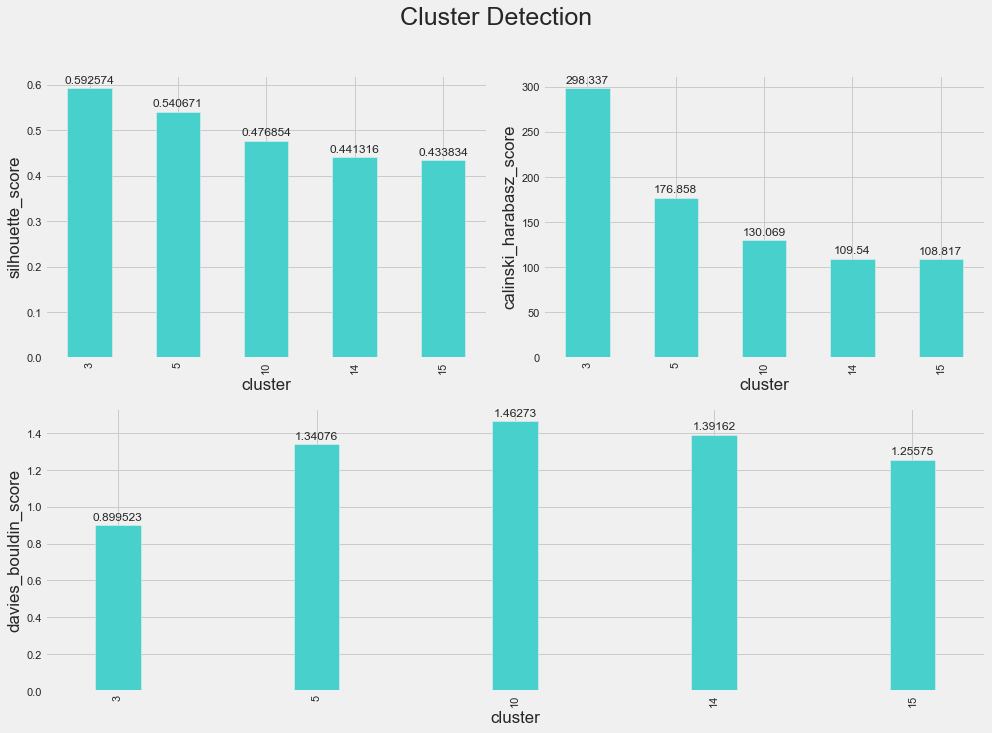

In [89]:
cluster_evaluation(df_mean_shift_scores)

+ __the majority of the results shows that the two of the metrics are refering to 3 clusters__
+ __it shows that 3 clusters are making better result than others__

In [90]:
df_mean_shift_scores[df_mean_shift_scores.cluster == 3]

cluster  bandwidth  quantile  sill_score  calinski_score  \
4        3   7.338485       0.9    0.592574      298.336671   

   davies_bouldin_score  
4              0.899523

__Implement MeanShift within the above hyperparameter values :__ 

In [91]:
mean_shift = MeanShift(bandwidth = 7.338485)
labels = mean_shift.fit_predict(df_scaled)

__Cluster frequency :__

In [92]:
cluster_frequency(labels, "MeanShift")

__Evaluation :__

In [93]:
evaluation(df_scaled, labels)

****************Evaluation Metrics****************

silhouette_score : 0.59

calinski_harabasz_score : 298.34

davies_bouldin_score : 0.9

**************************************************


In [94]:
mean_shift_centroids = mean_shift.cluster_centers_
# inverse the means, because they have been made by the scaled data and we want 
# to analyze them with the non-scaled data
mean_shift_centroids_inversed = scaler.inverse_transform(mean_shift_centroids)

In [95]:
mean_shift_centroids_inversed

array([[1.37446912e+03, 8.73253253e-01, 7.69010697e+02, 4.39416794e+02,
        3.29806764e+02, 6.81331758e+02, 4.91366621e-01, 1.96113267e-01,
        3.61360749e-01, 1.13856028e-01, 2.38400209e+00, 1.24497451e+01,
        4.25434951e+03, 1.26986004e+03, 5.97550162e+02, 1.56370598e-01,
        1.15303882e+01],
       [3.83796351e+03, 9.39394000e-01, 2.23500000e+02, 1.72300000e+02,
        5.12000000e+01, 8.15607826e+03, 1.81818333e-01, 9.09090000e-02,
        1.21212000e-01, 8.78788000e-01, 9.90000000e+01, 3.00000000e+00,
        8.83333333e+03, 7.98603689e+03, 9.60457569e+02, 4.76190000e-02,
        1.13333333e+01],
       [4.50700072e+03, 1.00000000e+00, 7.39418000e+03, 2.28820000e+03,
        5.10598000e+03, 5.42470179e+03, 1.00000000e+00, 9.16667000e-01,
        1.00000000e+00, 8.33333000e-01, 4.00000000e+01, 1.30000000e+02,
        1.10000000e+04, 1.04608795e+04, 1.07658950e+03, 0.00000000e+00,
        1.20000000e+01]])

__Adding clusters to the df_mean_shift :__

In [96]:
df_mean_shift = upt_df.copy()
df_mean_shift["Cluster"] = labels

__Cluster result :__

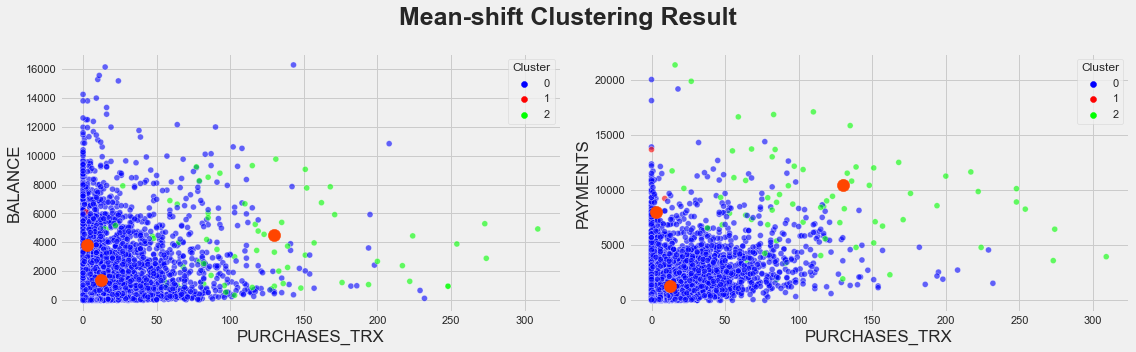

In [97]:
plot_cluster_result(df_mean_shift, mean_shift_centroids_inversed, "Mean-shift")

__Finally :__
   * The MeanShift algorithm accepts __3 clusters__ for this dataset

## 10.5 | Hierarchical clustering

__Hyperparameter :__

In [98]:
n_clusters = np.arange(2, 10)
linkage = ['ward', 'complete', 'average', 'single']

__Clustering :__

In [99]:
df_agglomerative_scores = []
for p in product(n_clusters, linkage) :
    agglomerative = AgglomerativeClustering(n_clusters = p[0], linkage = p[1])
    labels = agglomerative.fit_predict(df_scaled)
    score1 = silhouette_score(df_scaled, labels)
    score2 = calinski_harabasz_score(df_scaled, labels)
    score3 = davies_bouldin_score(df_scaled, labels)
    df_agglomerative_scores.append({"cluster" : len(np.unique(labels)), "linkage" : p[1], 
                       "sill_score" : score1, "calinski_score" : score2, "davies_bouldin_score" : score3})
df_agglomerative_scores = pd.DataFrame(df_agglomerative_scores)

__Cluster detection :__

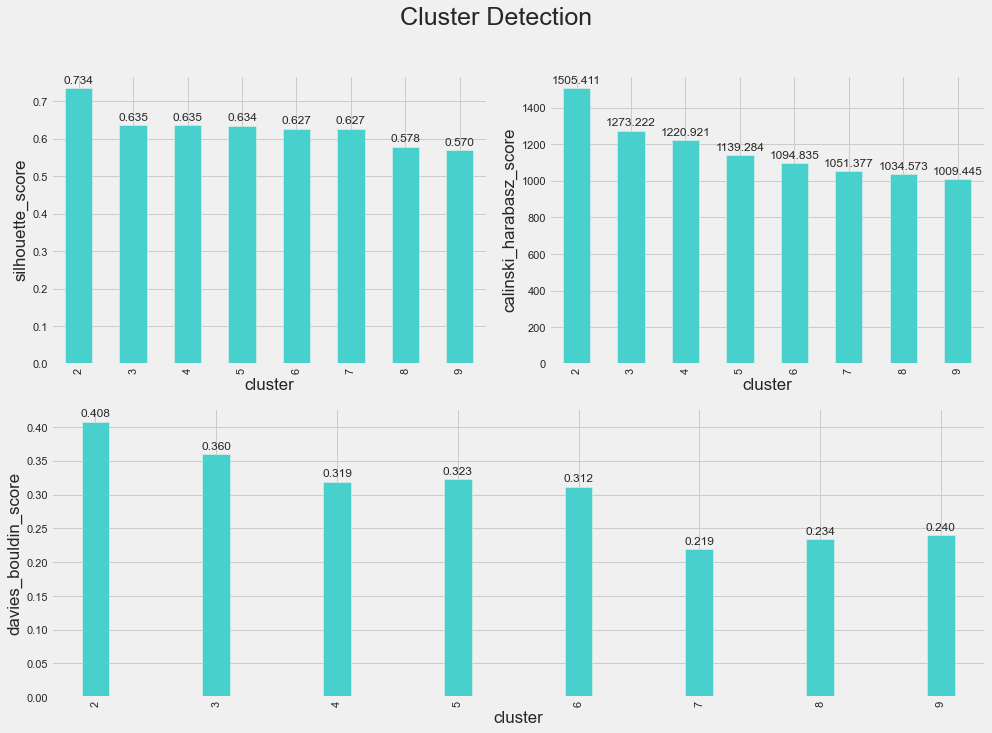

In [100]:
cluster_evaluation(df_agglomerative_scores, "%.3f")

In [101]:
df_agglomerative_scores[df_agglomerative_scores.cluster == 2]

cluster   linkage  sill_score  calinski_score  davies_bouldin_score
0        2      ward    0.184274     1505.410659              1.996698
1        2  complete    0.734125       65.702905              0.407912
2        2   average    0.734125       65.702905              0.407912
3        2    single    0.734125       65.702905              0.407912

__it is obvious that the first row is better as a result of :__
   * calinski_harabasz_score and davies_bouldin_score are in their best status :
       - davies_bouldin_score is lower than other ( great )
       - calinski_score is higher than others ( great )
       - the small silhoutte is ignored

In [102]:
agglomerative = AgglomerativeClustering(n_clusters = 2, linkage = "ward")
labels = agglomerative.fit_predict(df_scaled)

__Cluster frequency :__

In [103]:
cluster_frequency(labels, "Agglomerative")

__Evaluation :__

In [104]:
evaluation(df_scaled, labels)

****************Evaluation Metrics****************

silhouette_score : 0.18

calinski_harabasz_score : 1505.41

davies_bouldin_score : 2.0

**************************************************


__Adding clusters to the df_agg :__

In [105]:
df_agg = upt_df.copy()
df_agg["Cluster"] = labels

__Cluster result :__

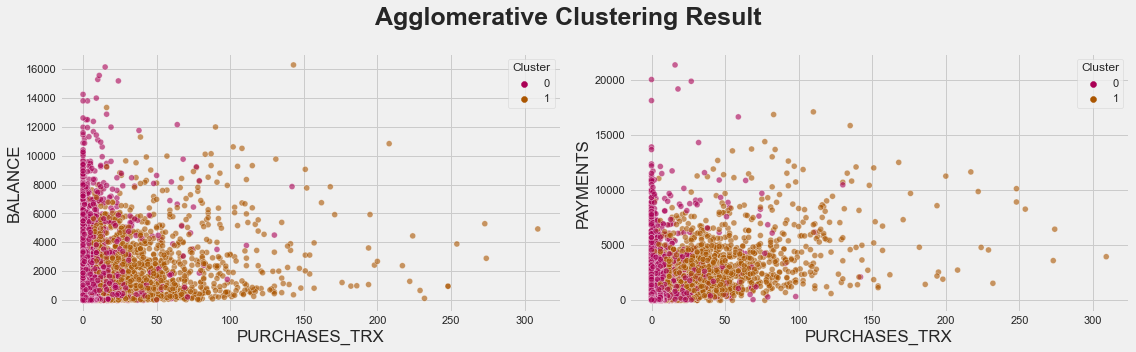

In [106]:
plot_cluster_result(df_agg, centroids = None, cluster_name = "Agglomerative", centers = False)

__Finally :__
   * The Agglomerative algorithm accepts __2 clusters__ for this dataset

## Generally

The __majority__ of the clustering algorithms say that ( there should be __2 clusters in this dataset__ ) and <br>
the others say __3 clusters__ is accepted <br>
__As a result :__ the behaviour of data changes by __two kind of customers__